### Install and import the libraries

In [39]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

### Dataset

Either download the dataset from Kaggle ([link](https://www.kaggle.com/competitions/titanic/data?select=train.csv)) and use the train.csv or import it with the following line:

In [1]:
!wget -O titanic.csv https://www.dropbox.com/scl/fi/eqqo8uun7lxs0qnzq0por/train.csv?rlkey=lf7t3dnwdfkjyvi2z574xkz5j&dl=0

--2024-02-14 03:28:12--  https://www.dropbox.com/scl/fi/eqqo8uun7lxs0qnzq0por/train.csv?rlkey=lf7t3dnwdfkjyvi2z574xkz5j
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucab37ab381db71faaa2902edd81.dl.dropboxusercontent.com/cd/0/inline/CNPrflSdlVbfpinnFuT5bxjAKFmh6MpiYrYmkounXr3SXlC-B8DBoUEOT1e1cW18MXtwgKZKD2u-Qn7ViUkFn7OKa-OjPm7hanTBuVHPRsFyEdq1e3nxnOnwsrvpjZBPrwNOua0SZ63uJSC3ByaPq4jP/file# [following]
--2024-02-14 03:28:13--  https://ucab37ab381db71faaa2902edd81.dl.dropboxusercontent.com/cd/0/inline/CNPrflSdlVbfpinnFuT5bxjAKFmh6MpiYrYmkounXr3SXlC-B8DBoUEOT1e1cW18MXtwgKZKD2u-Qn7ViUkFn7OKa-OjPm7hanTBuVHPRsFyEdq1e3nxnOnwsrvpjZBPrwNOua0SZ63uJSC3ByaPq4jP/file
Resolving ucab37ab381db71faaa2902edd81.dl.dropboxusercontent.com (ucab37ab381db71faaa2902edd81.dl.dropboxusercontent.com)... 162.125.1.15, 2620:100:

In [3]:
# Load the Titanic dataset (assuming you have the CSV file)
titanic_df = pd.read_csv('titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Get a summary of the dataset with .info
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Summary statistics for numerical columns
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Count the number of missing values in each column
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

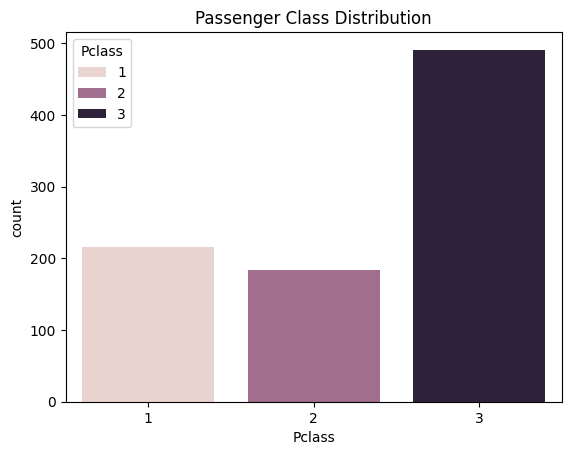

In [22]:
# Visualize the distribution of passengers by class
class_colors = ['red', 'green', 'blue']

sns.countplot(x='Pclass', data=titanic_df, hue='Pclass')

plt.title('Passenger Class Distribution')
plt.show()

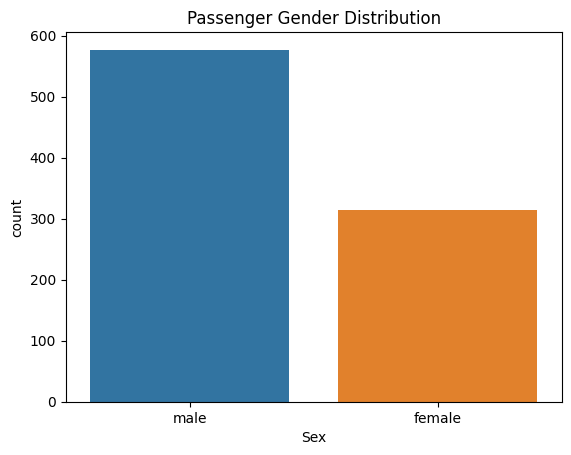

In [21]:
# Visualize the distribution of passengers by gender
sns.countplot(x='Sex', data=titanic_df, hue='Sex')
plt.title('Passenger Gender Distribution')
plt.show()

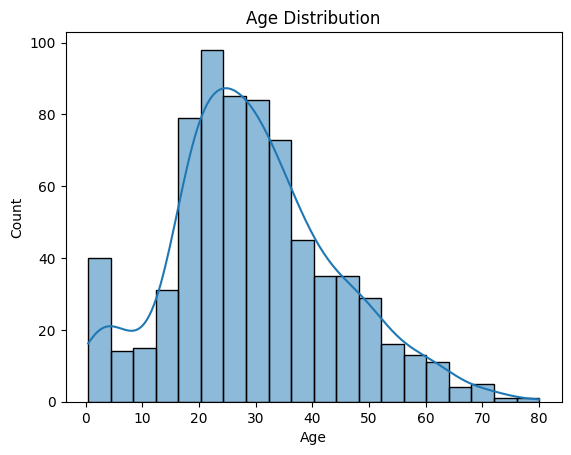

In [17]:
# Visualize the age distribution of passengers
sns.histplot(titanic_df['Age'].dropna(), kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

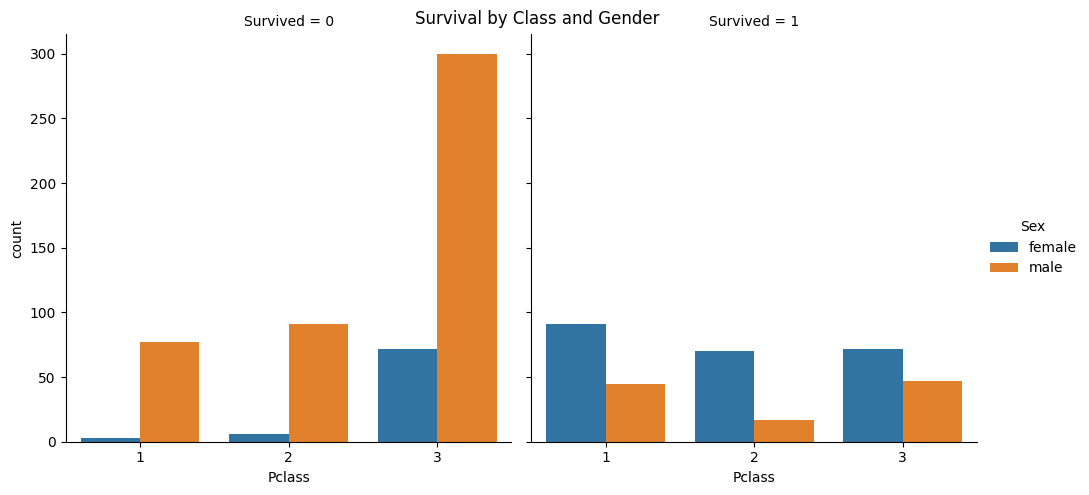

In [18]:
# Visualize the survival rate by class and gender
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data=titanic_df)
plt.suptitle('Survival by Class and Gender')
plt.show()

<ipython-input-23-1cbeba58145d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm')


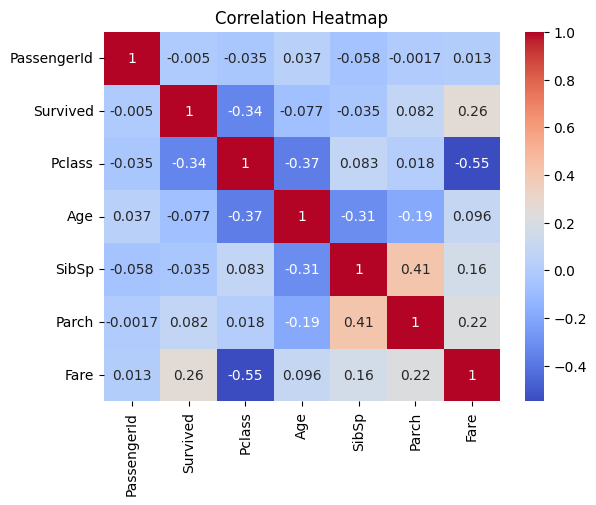

In [23]:
# Visualize the correlation between numerical variables
sns.heatmap(titanic_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [24]:
# select only the following features and save the new dataset into titanic_df
# [['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
titanic_df = titanic_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]


# drop all nulls
titanic_df.dropna(inplace=True)

<ipython-input-24-6fbc1b172fcf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df.dropna(inplace=True)


In [26]:
#check null values
titanic_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Survived    0
dtype: int64

In [25]:
# check the data types
titanic_df.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Survived      int64
dtype: object

In [27]:
# Convert categorical variables (e.g., 'Sex') to numerical using one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=['Sex'], drop_first=True)
titanic_df

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0,0
886,2,27.0,0,0,13.0000,0,1
887,1,19.0,0,0,30.0000,1,0
889,1,26.0,0,0,30.0000,1,1


In [28]:
# Split data into features (X) and target (y)
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

In [29]:
# Split the data into training and testing sets. Use 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [30]:
# Create an SVM classifier
svm = SVC()

# Fit the SVM model to the training data
svm.fit(X_train, y_train)


SVC()

In [31]:
# build a function that prints accuracy score, classification report,
# and the confusion matrix
def evaluate_model(y_test, preds):
    """
    create metrics for evaluating each model
    """

    # calculate accuracy score
    acc = accuracy_score(y_test, y_pred_svm)

    # create classification report
    classification_repo = classification_report(y_test, y_pred_svm)

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred_svm)

    # Evaluate the model
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_repo)
    print("Confusion Matrix:\n", cm)


In [32]:
# Predict on the test data and store it in y_pred_svm
y_pred_svm = svm.predict(X_test)

# evaluate
evaluate_model(y_test, y_pred_svm)

Accuracy: 0.8046511627906977
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       126
           1       0.83      0.66      0.74        89

    accuracy                           0.80       215
   macro avg       0.81      0.78      0.79       215
weighted avg       0.81      0.80      0.80       215

Confusion Matrix:
 [[114  12]
 [ 30  59]]


In [33]:
# create a decision tree
decision_tree = DecisionTreeClassifier()

# fit the tree
decision_tree.fit(X_train, y_train)

# store the prediction in y_pred_dt
y_pred_dt = decision_tree.predict(X_test)

In [34]:
# evaluate the model
evaluate_model(y_test, y_pred_dt)

Accuracy: 0.8046511627906977
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       126
           1       0.83      0.66      0.74        89

    accuracy                           0.80       215
   macro avg       0.81      0.78      0.79       215
weighted avg       0.81      0.80      0.80       215

Confusion Matrix:
 [[114  12]
 [ 30  59]]


In [35]:
from sklearn.ensemble import RandomForestClassifier

# build a random forest model
model = RandomForestClassifier(n_estimators=100)

# fit the model
model.fit(X_train, y_train)

# store the predictions inside y_pred_rf
y_pred_rf = model.predict(X_test)

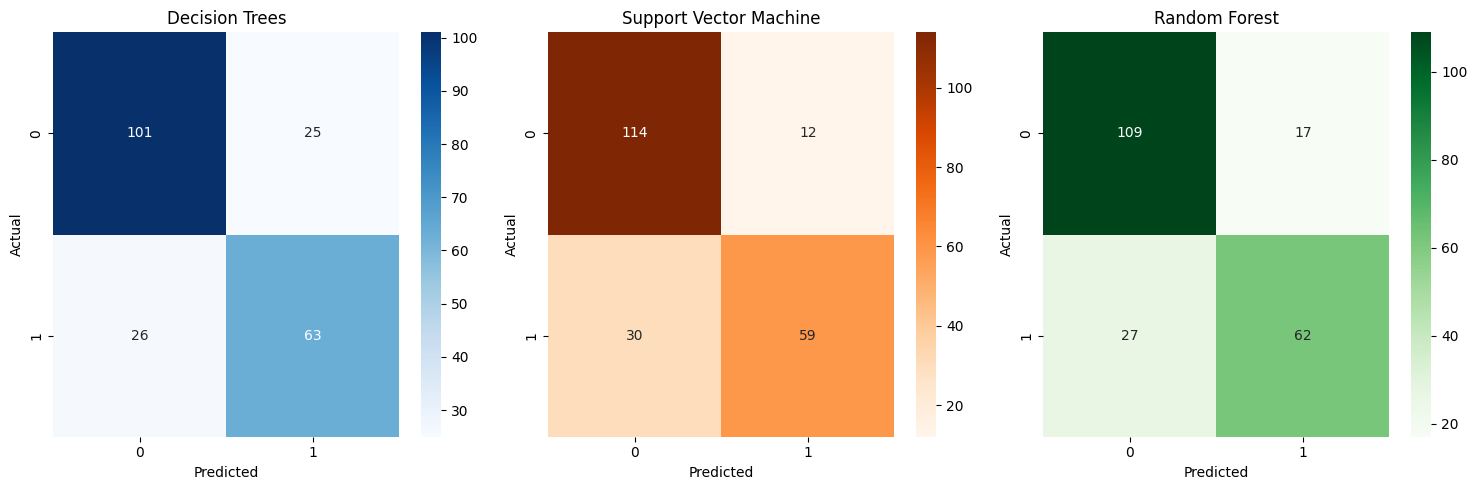

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create confusion matrices for each model
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_svm = confusion_matrix(y_test, y_pred_svm)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Set up subplots for each confusion matrix
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create a heatmap for Decision Trees
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Trees')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Create a heatmap for SVM
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Support Vector Machine')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Create a heatmap for Random Forest
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[2])
axes[2].set_title('Random Forest')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()


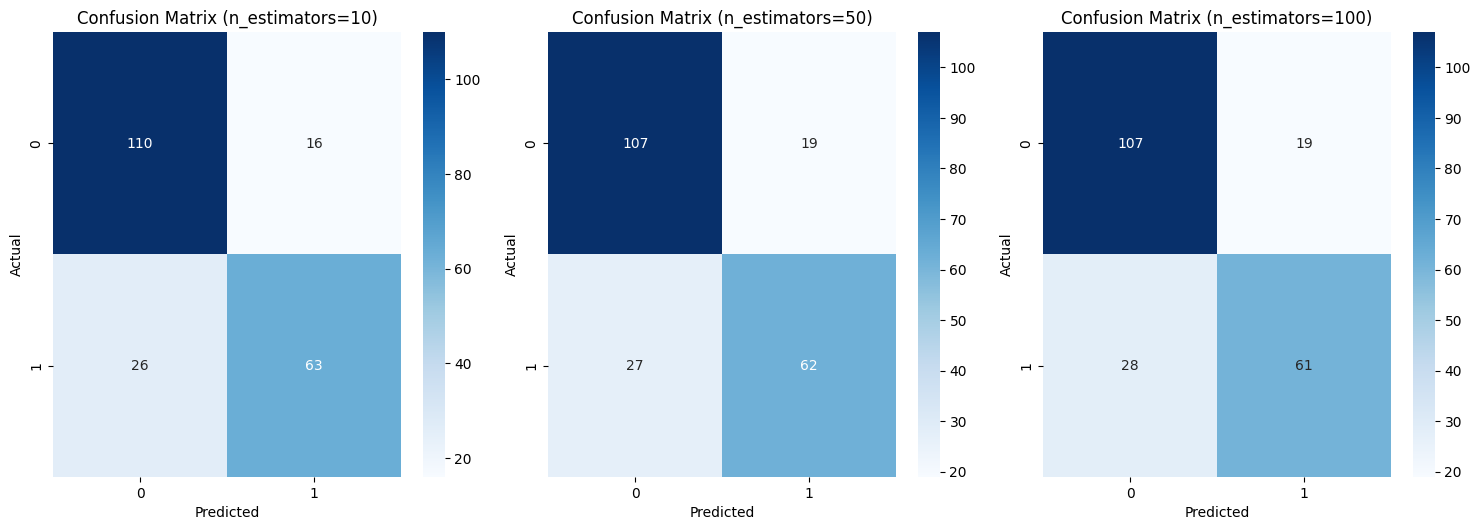

In [37]:
# try to change the number of trees in random forest and see what happens

# Define a range of values for the number of trees (n_estimators)
n_estimators_values = [10, 50, 100]

# Lists to store confusion matrices for different n_estimators values
confusion_matrices = []

# Loop through different n_estimators values
for n_estimators in n_estimators_values:
    # Create and train the Random Forest model
    rf = RandomForestClassifier(n_estimators=n_estimators)
    rf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred_rf = rf.predict(X_test)

    # Calculate the confusion matrix and store it in the list
    cm = confusion_matrix(y_test, y_pred_rf)
    confusion_matrices.append(cm)

# Plot the confusion matrices using heatmaps
plt.figure(figsize=(15, 10))
for i, n_estimators in enumerate(n_estimators_values):
    plt.subplot(2, 3, i + 1)
    sns.heatmap(confusion_matrices[i], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix (n_estimators={n_estimators})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


### Optional - Grid search

Grid Search is a technique used in machine learning to find the best hyperparameters for a machine learning model. It's a systematic method of searching through a range of hyperparameter values to find the combination that results in the best model performance. Grid Search is particularly useful for models with hyperparameters that significantly impact model performance, such as Support Vector Machines (SVMs) with different kernel functions and regularization parameters.

GridSearchCV will try all possible combinations of hyperparameters in the specified parameter grid and choose the combination that results in the best cross-validated performance. This way, you can create an optimized SVC model for your specific dataset.

Keep in mind that Grid Search can be computationally expensive, especially with a large parameter grid. In such cases, you may want to consider other techniques like Randomized Search or Bayesian Optimization to efficiently explore the hyperparameter space.

In [38]:

# Define a parameter grid for each model
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1]
}

rf_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a function to perform grid search and return the best model
def tune_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return best_params, best_model, accuracy

# Example usage with your data
svc_best_params, svc_best_model, svc_accuracy = tune_and_evaluate_model(SVC(), svc_param_grid, X_train, y_train, X_test, y_test)
rf_best_params, rf_best_model, rf_accuracy = tune_and_evaluate_model(RandomForestClassifier(), rf_param_grid, X_train, y_train, X_test, y_test)
dt_best_params, dt_best_model, dt_accuracy = tune_and_evaluate_model(DecisionTreeClassifier(), dt_param_grid, X_train, y_train, X_test, y_test)

# Print the results
print("SVC Best Parameters:", svc_best_params)
print("SVC Accuracy:", svc_accuracy)
print("\nRandom Forest Best Parameters:", rf_best_params)
print("Random Forest Accuracy:", rf_accuracy)
print("\nDecision Tree Best Parameters:", dt_best_params)
print("Decision Tree Accuracy:", dt_accuracy)


SVC Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC Accuracy: 0.8

Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Random Forest Accuracy: 0.8

Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 0.7581395348837209
